Let's use the breast cancer dataset and use one feature to predict of features of the dataset. 

In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [69]:

import numpy as np
import pandas as pd
from scipy import stats

class MyLinearRegression:
    def __init__(self):
        # Initialize class attributes
        self.X = None           # Features matrix
        self.features = None    # Names of features
        self.y = None           # Target vector
        self.predictor = None   # Name of target variable
        self.n = None           # Number of observations
        self.p = None           # Number of features
        self.bias = None        # Whether to include bias term
        self.coefficients = None    # Coefficients (parameters) of the model
        self.predicted_values = None   # Predicted values

    # Fit the linear regression model
    def fit(self, X, y, include_bias=True):
        # Store feature names and target variable name
        self.features = X
        self.predictor = y
        
        # Convert DataFrame inputs to numpy arrays
        X = X.to_numpy()
        y = y.to_numpy()

        # Include bias term if specified
        if include_bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)

        # Store input data and metadata
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = include_bias

        # Compute coefficients using ordinary least squares
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
        # Compute predicted values
        self.predicted_values = X @ self.coefficients

    # Predict target variable for new data
    def predict(self, X_new):
        # Include bias term if specified
        if self.bias:
            ones_column = np.ones((X_new.shape[0], 1))
            X_new = np.append(ones_column, X_new, axis=1)
        return X_new @ self.coefficients

    # Compute sum of squared errors (SSE)
    def SSE(self):
        return np.sum((self.y - self.predicted_values) ** 2)

    # Compute mean squared error (MSE)
    def MSE(self):
        return self.SSE() / (self.n - self.p)

    # Compute sum of squares regression (SSR)
    def SSR(self):
        return np.sum((self.predicted_values - np.mean(self.y)) ** 2)

    # Compute mean squared regression (MSR)
    def MSR(self):
        return self.SSR() / (self.p - 1)

    # Compute sum of squares total (SST)
    def SST(self):
        return np.sum((self.y - np.mean(self.predicted_values)) ** 2)

    # Compute coefficient of determination (R^2)
    def R_squared(self):
        return 1 - self.SSE() / self.SST()

    # Compute adjusted coefficient of determination (adjusted R^2)
    def adjusted_R_squared(self):
        return 1 - (1 - self.R_squared()) * (self.n - 1) / (self.n - self.p - 1)

    # Compute standard deviation of coefficients
    def sd_coef(self):
        return np.sqrt(np.diagonal(self.MSE() * np.linalg.inv(self.X.T @ self.X)))

    # Compute t-statistic and p-value for coefficients
    def t_statistic(self):
        t = self.coefficients / self.sd_coef()
        t_p = [2 * (1 - stats.t.cdf(np.abs(i), (self.n - self.p - 1))) for i in t]
        return t, t_p

    # Compute F-statistic and p-value for overall model
    def F_statistic(self):
        F = self.MSR() / self.MSE()
        df_1 = self.p - 1
        df_2 = self.n - self.p
        F_p = 1 - stats.f.cdf(F, df_1, df_2)
        return F, F_p

    # Compute root mean square error (RMSE) for new data
    def RMSE(self, X_new, y_true):
        y_pred = self.predict(X_new)
        return np.sqrt(np.sum((y_true - y_pred) ** 2) / len(y_true))

    # Print summary of the linear regression model
    def summary(self):
        # Create DataFrame to display coefficients and related statistics
        coef_df = pd.DataFrame({
            'Estimate': self.coefficients,
            'Std.Error': self.sd_coef(),
            't value': self.t_statistic()[0],
            'Pr(>|t|)': self.t_statistic()[1]
        }, index=['Intercept'] + list(self.features))

        # Print coefficient table
        print(coef_df)

        # Print additional model statistics
        print(f"Residual standard error: {round(np.sqrt(self.MSE()), 3)} on {self.n - self.p} degrees of freedom.")
        print(f"R-squared: {round(self.R_squared(), 3)}, Adjusted R-squared: {round(self.adjusted_R_squared(), 3)}")
        print(f"F-statistic: {round(self.F_statistic()[0], 3)} on {self.p - 1} and {self.n - self.p} DF, "
              f"p-value: {round(self.F_statistic()[1], 3)}")


In [70]:
data = datasets.load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target

x = df[['mean compactness']]
y = df['mean symmetry']


In [72]:
model = MyLinearRegression()


# Print coefficients and intercept
model.fit(x, y)


# Evaluate the model on the testing data
predictions = model.predict(x)
mse = np.mean((y - predictions) ** 2)
print("Mean Squared Error on test set:", mse)

Mean Squared Error on test set: 0.0004777592049115463


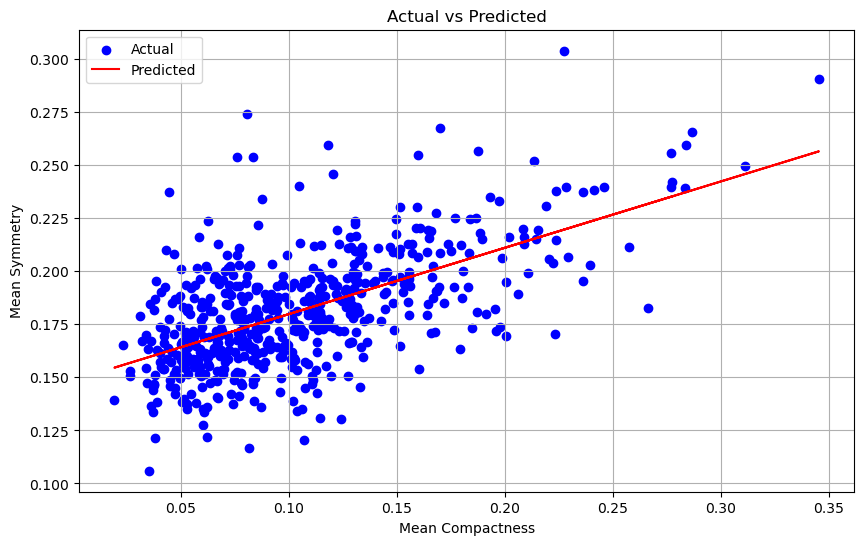

In [74]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, predictions, color='red', label='Predicted')
plt.xlabel('Mean Compactness')
plt.ylabel('Mean Symmetry')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

## Discussion: Low RMSE in Linear Regression Analysis

The low Root Mean Squared Error (RMSE) observed in the linear regression analysis of the relationship between mean compactness and mean symmetry in the breast cancer dataset suggests that a linear model provides a good fit to the data.

Several factors may contribute to the low RMSE:

1. **Linear Relationship**: The relationship between mean compactness and mean symmetry may indeed be approximately linear. Linear regression assumes a linear relationship between the independent and dependent variables, and if this assumption holds true, the model will accurately capture the underlying trend in the data.

2. **Homoscedasticity**: Linear regression assumes that the variance of the residuals (the differences between observed and predicted values) is constant across all levels of the independent variable. If the residuals exhibit homoscedasticity, the model's predictions will be consistent across the range of the independent variable, leading to a low RMSE.

3. **Low Noise**: The dataset may contain relatively low levels of noise or random variability, allowing the linear regression model to accurately estimate the relationship between mean compactness and mean symmetry. This dataset was acquired and screened pretty rigorously by the standards of radiology.

4. **Appropriate Features**: The features selected for the analysis, mean compactness and mean symmetry, may be strong predictors of each other. If these features contain relevant information about the relationship under study, the linear regression model will be able to make accurate predictions with low error.

It's important to note that while linear regression has provided a low RMSE in this analysis, further investigation is warranted to validate the findings and assess the model's robustness. Additionally, alternative modeling techniques and validation approaches should be considered to ensure the reliability and generalizability of the results.
